# Explore the dataset


In this notebook, we will perform an EDA (Exploratory Data Analysis) on the processed Waymo dataset (data in the `processed` folder). In the first part, you will create a function to display 

In [15]:
from utils import get_dataset
import glob
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
%matplotlib inline
from google.protobuf.json_format import MessageToJson
from utils import get_dataset
import io
import os
import argparse
import logging
import tensorflow.compat.v1 as tf
from PIL import Image
from waymo_open_dataset import dataset_pb2 as open_dataset
import glob
import json
from matplotlib.patches import Rectangle
from PIL import Image

In [16]:
dataset = get_dataset("/home/workspace/data/train/*.tfrecord")

INFO:tensorflow:Reading unweighted datasets: ['/home/workspace/data/train/*.tfrecord']
INFO:tensorflow:Reading record datasets for input file: ['/home/workspace/data/train/*.tfrecord']
INFO:tensorflow:Number of filenames to read: 86


## Write a function to display an image and the bounding boxes

Implement the `display_images` function below. This function takes a batch as an input and display an image with its corresponding bounding boxes. The only requirement is that the classes should be color coded (eg, vehicles in red, pedestrians in blue, cyclist in green).

In [17]:
def display_images(dataset):
    # TODO - Your implementation here
    """
    create a grid visualization of images with color coded bboxes
    args:
    - ground_truth [list[dict]]: ground truth data
    """
    count = 0
    for idx,data in enumerate(dataset):
        # color mapping of classes
        colormap = {1: [1, 0, 0], 2: [0, 1, 0], 4: [0, 0, 1]}
        f, ax = plt.subplots()
        img = data['image']
        ax.imshow(img)
        
        bboxes = data['groundtruth_boxes']
        classes = data['groundtruth_classes']
        for cl, bb in zip(classes, bboxes):
            bb = bb.numpy() 
            bb = bb * data['image'].shape[0]
            #print(bb)
            y1, x1, y2, x2 = bb
            rec = Rectangle((x1, y1), x2- x1, y2-y1, facecolor='none', 
                            edgecolor=colormap[cl.numpy()])
            #print(rec)
            ax.add_patch(rec)
        ax.axis('off')
        plt.tight_layout()
        plt.show()
        
        count += 1
        if count == 10:
            break

## Display 10 images 

Using the dataset created in the second cell and the function you just coded, display 10 random images with the associated bounding boxes. You can use the methods `take` and `shuffle` on the dataset.

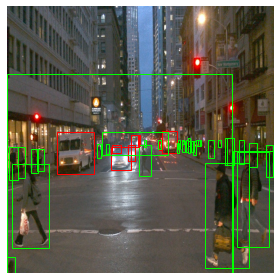

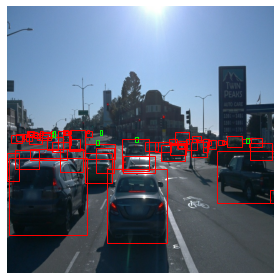

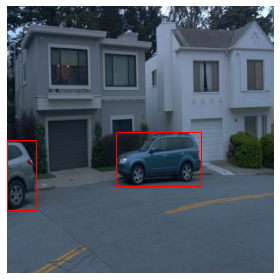

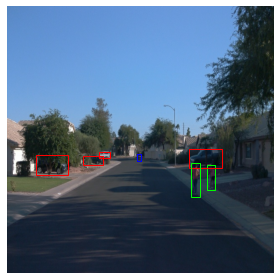

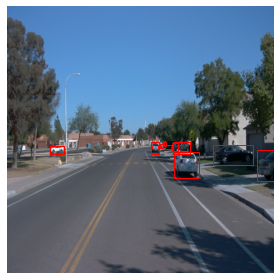

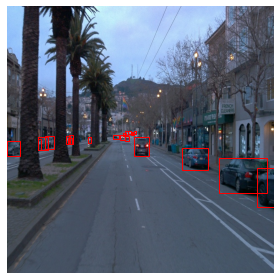

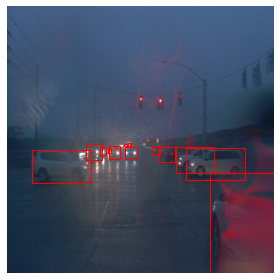

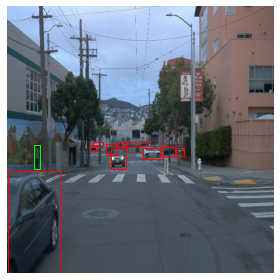

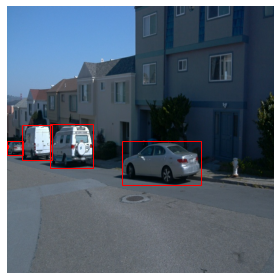

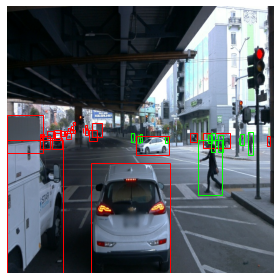

In [18]:
# Display 10 random images in dataset
display_images(dataset)


Instead of using a single file I have used the entire train dataset and randomly chosen 10 images 
to display. from this it is clear that we have images from different conditions like bright day light, night time,
raining,poor visibility, with water droplets on camera lens etc which is robust and close to realiyu


## Additional EDA

In this last part, you are free to perform any additional analysis of the dataset. What else would like to know about the data?
For example, think about data distribution. So far, you have only looked at a single file...

In [19]:
import numpy as np

In [20]:
def analysis(no_of_images):
    """
    This function tries to analyse the class distribution and image stand dar deviation in given images
    """
    mean = []
    stand_dev = []
    class_dist_1 = 0 
    class_dist_2 = 0
    class_dist_4 = 0
    for idx,data in enumerate(dataset):
        classes = data['groundtruth_classes'].numpy()
        cls, counts = np.unique(classes, return_counts=True)
        mean.append(np.mean(data['image'].numpy()))
        stand_dev.append(np.std(data['image']))
        #class_dist.append(dict(zip(cls,counts)))
        #print(cls)
        if (cls==1).sum() != 0:
            class_dist_1+=1
        if (cls==2).sum() != 0:
            class_dist_2+=1
        if (cls==4).sum() != 0:
            class_dist_4+=1

        # calculate class distribution
        if idx == no_of_images:
            #mean, std_dev, class_dist_1, class_dist_2, class_dist_4 = analysis(idx)
            sum_classes = class_dist_1 + class_dist_2 + class_dist_4 
            print("Ratio of class 1:2:4 for "+ str(idx)  + " images is "+ str(class_dist_1/sum_classes) +' : ' +str(class_dist_2/sum_classes)+ ' : ' +str(class_dist_4/sum_classes))
            print("Standard deviation of image pixel values are "+ str(np.std(np.array(stand_dev))))
            return 

In [21]:
# Ratio of classes in first 10000 images
for no_images in [1000,3000,6000,10000]:
    analysis(no_images)

Ratio of class 1:2:4 for 1000 images is 0.6011306532663316 : 0.3285175879396985 : 0.07035175879396985
Standard deviation of image pixel values are 15.049151763614308
Ratio of class 1:2:4 for 3000 images is 0.609622283182106 : 0.32644017725258495 : 0.06393753956530913
Standard deviation of image pixel values are 14.597295210060496
Ratio of class 1:2:4 for 6000 images is 0.6124137931034482 : 0.3263660477453581 : 0.06122015915119364
Standard deviation of image pixel values are 14.790758034291173
Ratio of class 1:2:4 for 10000 images is 0.6135188613008233 : 0.32501436139656603 : 0.06146677730261058
Standard deviation of image pixel values are 14.866242421458185


1. The closer values indicate ratio of classes preserved beyond 5k images
2. The class 1 with vehicles in pre dominate in the dataset. we must be careful in analysing our results

In [22]:
# Val dataset analysis

In [23]:
val_dataset = get_dataset("/home/workspace/data/val/*.tfrecord")

INFO:tensorflow:Reading unweighted datasets: ['/home/workspace/data/val/*.tfrecord']
INFO:tensorflow:Reading record datasets for input file: ['/home/workspace/data/val/*.tfrecord']
INFO:tensorflow:Number of filenames to read: 10


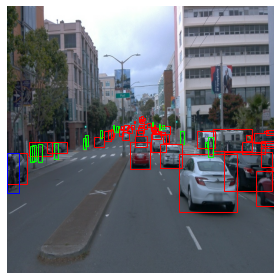

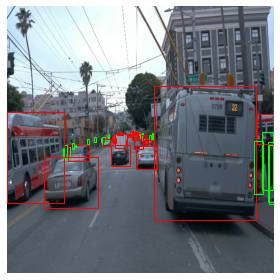

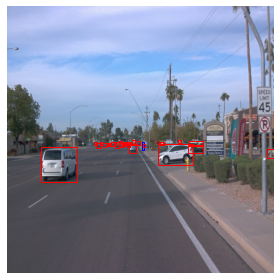

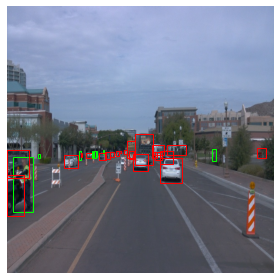

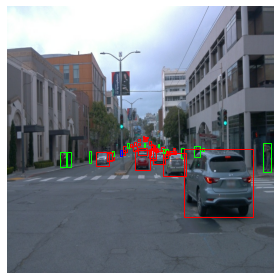

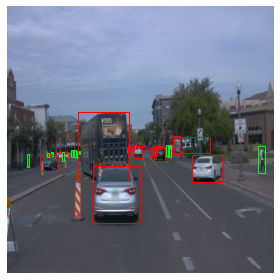

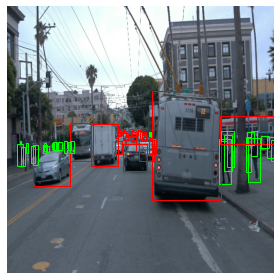

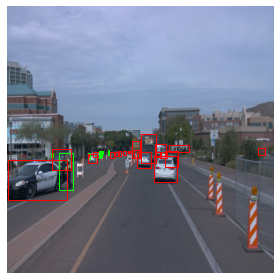

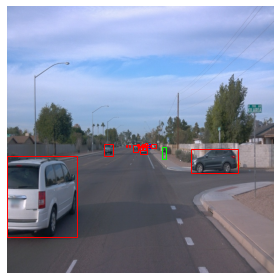

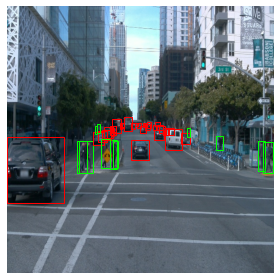

In [24]:
display_images(val_dataset)

In [25]:
# Analyse random 1000 images
analysis(1000)

Ratio of class 1:2:4 for 1000 images is 0.6064638783269962 : 0.32636248415716096 : 0.06717363751584284
Standard deviation of image pixel values are 14.974268523101372


In [26]:
# Test data analysis

INFO:tensorflow:Reading unweighted datasets: ['/home/workspace/data/test/*.tfrecord']
INFO:tensorflow:Reading record datasets for input file: ['/home/workspace/data/test/*.tfrecord']
INFO:tensorflow:Number of filenames to read: 3


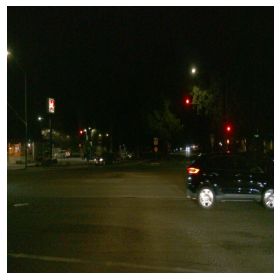

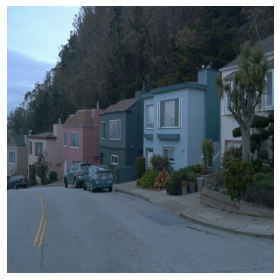

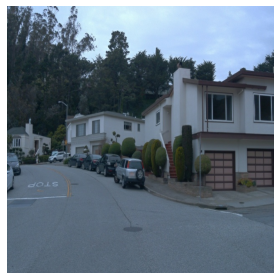

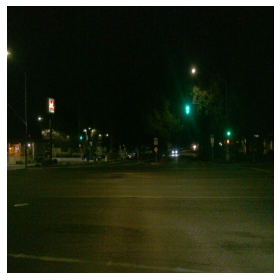

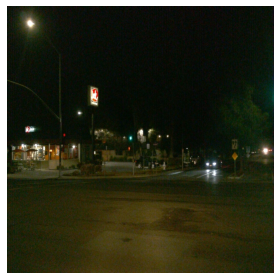

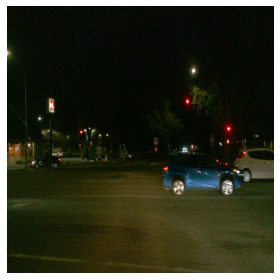

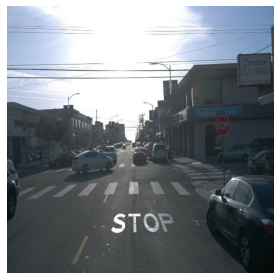

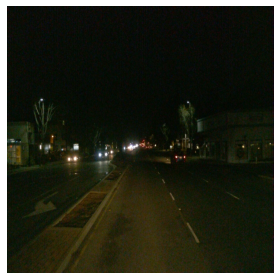

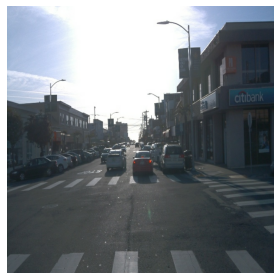

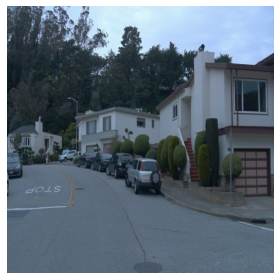

In [27]:
test_dataset = get_dataset("/home/workspace/data/test/*.tfrecord")
display_images(test_dataset)

In [28]:
# Analyse random 1000 images
analysis(1000)

Ratio of class 1:2:4 for 1000 images is 0.6218112244897959 : 0.3239795918367347 : 0.054209183673469385
Standard deviation of image pixel values are 14.221522991496265


Class ratio is preserved in both test and validation sets. Boht training and validation have different driving scenario images and Hence the performance on validation and test sets can be a good estimate of model generalization